In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Enable interactive plot

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, interact_manual
import numpy as np
from shapely.geometry import LineString
import matplotlib
import matplotlib.ticker as mticker
import cmath

In [2]:
def calc_speed(f,E):
    sigma = 0.33
    
    g  =9.81
    p_ice  =917
    v_p2 =E / (p_ice *  (1 - sigma**2))
    p_water = 1000
    c = np.arange(10,1500,1).astype(float)
    # c = 1000
    a = v_p2 * np.pi**2 * f**2 * H**3 * p_ice / (3*p_water)
    b =  (p_ice / p_water * H - g / (4*np.pi**2*f**2))
    d = np.zeros((1490,1))
    e = np.zeros((1490,1))
    velocity = np.zeros((270,1))
    
    for i in range(len(c)):
        d[i] = c[i]**5 /(2 * np.pi * f)
        e[i] = (a-b*c[i]**4 ) * abs(cmath.sqrt(1 - c[i]**2 / 1440**2))
        
    
    line_1 = LineString(np.column_stack((c,d)))
    line_2 = LineString(np.column_stack((c,e)))
    
    intersection = line_1.intersection(line_2)
    return intersection.xy[0]

In [68]:

def animate(iframe):
    i=0
    factor = 1./len(frequency)
    for indx,freq in enumerate(frequency):
        #--------------------------------------------------------------------
        # ICE
        #--------------------------------------------------------------------
        omega = freq * np.pi * 2
        k_ice = omega / c_ice[indx]

        k_air = omega / c_air

        kx = k_ice
        ky = np.sqrt(k_air**2 - kx**2 + 0j)  #?

        xx, yy = np.meshgrid(x_air, y_air)

        t = iframe * dt

        #y = np.exp(-1j * (omega*t - kx*x -ky*y))
        u_ice = np.real(np.exp(-1j * (omega*t - k_ice*x_ice))) * factor * 4# * (abs(ky)/k_air) * factor
        if i==0:
            u_tot = np.zeros((len(u_ice)))
            i=1
        u_tot +=u_ice
        #--------------------------------------------------------------------
        # ATHMOSPHERE
        #--------------------------------------------------------------------
        disp_u = np.real(np.exp(-1j * (omega*t - kx*xx -ky*yy))) * factor
        disp_v = np.real(np.exp(-1j * (np.pi/2. + omega*t - kx*xx -ky*yy))) * factor

        if i==1:
            disp_u_tot = np.zeros(disp_u.shape)
            disp_v_tot = np.zeros(disp_v.shape)
            i=2
        disp_u_tot +=disp_u
        disp_v_tot +=disp_v

        if kx < k_air: #Plane Wave
            disp_x = disp_u_tot * (kx/k_air)
            disp_y = disp_u_tot * (np.real(ky)/k_air)
        else: # Evanecent Wave
            disp_x = np.zeros_like(disp_u) # disp_u_tot * (kx/k_air)
            disp_y = np.zeros_like(disp_u) # -disp_v_tot * (abs(ky)/k_air)

        if i==2:
            disp_x_tot = np.zeros(disp_x.shape)
            disp_y_tot = np.zeros(disp_y.shape)
            i=3

        disp_x_tot +=disp_x
        disp_y_tot +=disp_y


    scat.set_data(((xx + disp_x_tot).flatten(), 
                   (yy + disp_y_tot).flatten()))

    line.set_data((x_ice, u_tot))
    
    
        
    return 

In [66]:
frequency = np.geomspace(0.1,1000,100)
velocity = np.zeros((len(frequency),1))
E = [6.5e9]
H  = 0.5

for E in(E):
    for i in range(len(frequency)):
        velocity[i] = calc_speed(frequency[i],E)[0]
        print(i, frequency[i], velocity[i])

c_ice = velocity
vg_ice = 2 * c_ice
#frequency =  [5,6,7,8,9]
#c_ice = [900,900,900,900,900]


0 0.1 [15.58076979]
1 0.10974987654930562 [14.41415859]
2 0.12045035402587821 [13.51952906]
3 0.1321941148466029 [12.96008848]
4 0.14508287784959398 [12.55866353]
5 0.1592282793341092 [12.42697018]
6 0.17475284000076838 [12.47026089]
7 0.19179102616724888 [12.65736878]
8 0.2104904144512021 [12.98549505]
9 0.23101297000831597 [13.32937442]
10 0.2535364493970112 [13.80390051]
11 0.2782559402207124 [14.32526617]
12 0.30538555088334157 [14.9508841]
13 0.33516026509388425 [15.58564046]
14 0.36783797718286343 [16.31248627]
15 0.40370172585965547 [17.11164853]
16 0.4430621457583881 [17.96556654]
17 0.4862601580065355 [18.86422123]
18 0.533669923120631 [19.83372062]
19 0.5857020818056667 [20.87379002]
20 0.6428073117284322 [21.98760653]
21 0.7054802310718644 [23.15236082]
22 0.7742636826811272 [24.39292316]
23 0.8497534359086445 [25.72288556]
24 0.9326033468832199 [27.13518355]
25 1.0235310218990263 [28.61780157]
26 1.1233240329780276 [30.20159033]
27 1.2328467394420666 [31.87683423]
28 1.3530

In [70]:
c_air = 330.
dt = 0.0005
xmax = 400
ymax =100
dx_air = 2
x_air = np.arange(-xmax*0.25, xmax*0.75, dx_air)
y_air = np.arange(0, ymax, dx_air) 
dx_ice = 0.1
x_ice = np.arange(-xmax*0.25, xmax*0.75, dx_ice)


<IPython.core.display.Javascript object>


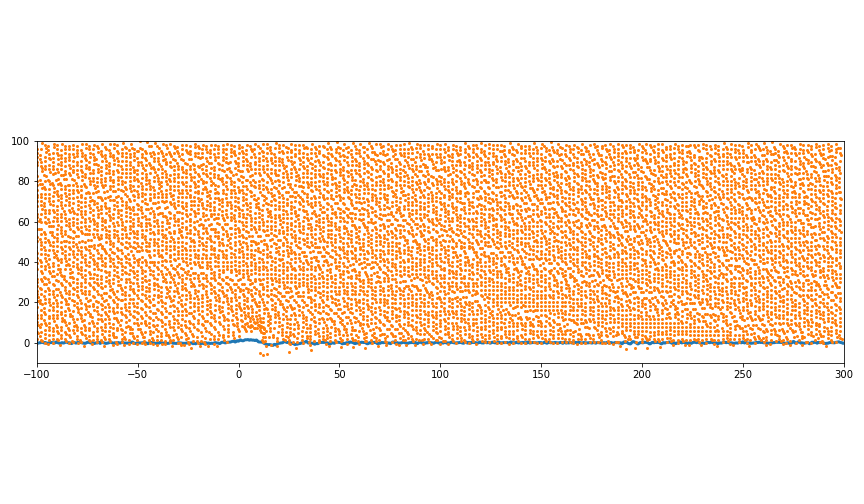

In [71]:
fig, ax = plt.subplots(figsize=(12, 7))
line, = ax.plot([], lw=3)     # A tuple unpacking to unpack the only plot
scat, = ax.plot([], '.', lw=0, ms=4) 
ax.set_xlim(-xmax*0.25, xmax*0.75)
ax.set_ylim(-10, ymax)
ax.set_aspect('equal', 'box')
plt.tight_layout()


anim = FuncAnimation(fig, animate, frames=400, interval=20)
plt.show()

In [8]:
print(x_ice)

[-30.  -29.9 -29.8 ...  89.7  89.8  89.9]


<IPython.core.display.Javascript object>


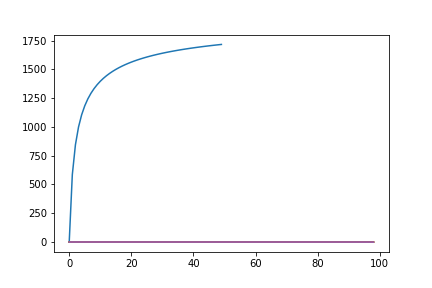

In [18]:
def phase_vel(f, vs):
    rho_ice = 900
    rho_h2o = 1000
    c = vs * np.sqrt(8/3 * rho_ice/rho_h2o * )
    return(vs * (1. - 1. / np.sqrt(f+1)))

f = np.arange(0, 50)
plt.plot(f, phase_vel(f, vs=2000))

In [8]:
c_ice

array([[317.04923545],
       [319.79237049],
       [322.51669781],
       [325.22333309],
       [327.91184121],
       [330.58108858],
       [333.2340965 ],
       [335.86997278],
       [338.48794866],
       [341.09106329]])

In [9]:
freq = 4        
omega = freq * np.pi * 2
k_ice = omega / c_ice
k_air = omega / c_air

kx = k_ice
ky = np.sqrt(k_air**2 - kx**2 + 0j)  #?


dx = 0.01
x = np.arange(0, xmax, dx)

xx, yy = np.meshgrid(x_air, y_air)

t = 2 * dt

#y = np.exp(-1j * (omega*t - kx*x -ky*y))
u_ice = np.real(np.exp(-1j * (omega*t - k_ice*x))) * (abs(ky)/k_air) * 10
    

line.set_data((x, u_tot))


NameError: name 'u_tot' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(x,u_ice)

In [ ]:
i=0
for indx,freq in enumerate(frequency):
        
    omega = freq * np.pi * 2
    k_ice = omega / c_ice[indx]

    k_air = omega / c_air

    kx = k_ice
    ky = np.sqrt(k_air**2 - kx**2 + 0j)  #?


    dx = 0.01
    x = np.arange(0, xmax, dx)

    xx, yy = np.meshgrid(x_air, y_air)

    t = 1 * dt

    #y = np.exp(-1j * (omega*t - kx*x -ky*y))
    u_ice = np.real(np.exp(-1j * (omega*t - k_ice*x))) * (abs(ky)/k_air) * 10
    if i==0:
        u_tot = np.zeros((len(u_ice)))
        i=1
    u_tot +=u_ice
    #--------------------------------------------------------------------
    disp_u = np.real(np.exp(-1j * (omega*t - kx*xx -ky*yy))) * 10
    disp_v = np.real(np.exp(-1j * (np.pi/2. + omega*t - kx*xx -ky*yy))) * 10
        
    if i==1:
        disp_u_tot = np.zeros(disp_u.shape)
        disp_v_tot = np.zeros(disp_v.shape)
        i=2
    disp_u_tot +=disp_u
    disp_v_tot +=disp_v
        
    if kx < k_air: #Plane Wave
        disp_x = disp_u_tot * (kx/k_air)
        disp_y = disp_u_tot * (np.real(ky)/k_air)
    else: # Evanecent Wave
        disp_x =  disp_u_tot * (kx/k_air)
        disp_y =  -disp_v_tot * (abs(ky)/k_air)
            
    if i==2:
        disp_x_tot = np.zeros(disp_x.shape)
        disp_y_tot = np.zeros(disp_y.shape)
        i=3
            
    disp_x_tot +=disp_x
    disp_y_tot +=disp_y

            
            

scat.set_data(((xx + disp_x_tot).flatten(), 
                   (yy + disp_y_tot).flatten()))
    
line.set_data((x, u_tot))

In [ ]:
disp_u_tot = np.zeros(disp_u.shape)


In [ ]:
disp_u_tot.shape